# Customer  Churn prediction

Life cycle of the machine learning

1. Understading the probel statement
2. Data collection
3. Exploratory data analysis
4. data Cleaning
5. Data Pre-processing
6. model Training
7. choose best Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis= 1 , inplace=True)

In [4]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# Exploring the data

In [11]:
numerical_feature = [feature  for feature in df.columns if df[feature].dtype != 'O']
categorical_featue = [feature for feature in df.columns if df[feature].dtype == 'O']

print (numerical_feature)
print (categorical_featue)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
['Geography', 'Gender']


In [13]:
for col in categorical_featue:
    print (df[col].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64


# Univeriate Analysis

The term univeriate analysis refer to the analysis of one variable prefix 'uni' means 'one'. The purposed of univeriate anaysis is to understand 
distribution of value for single variable

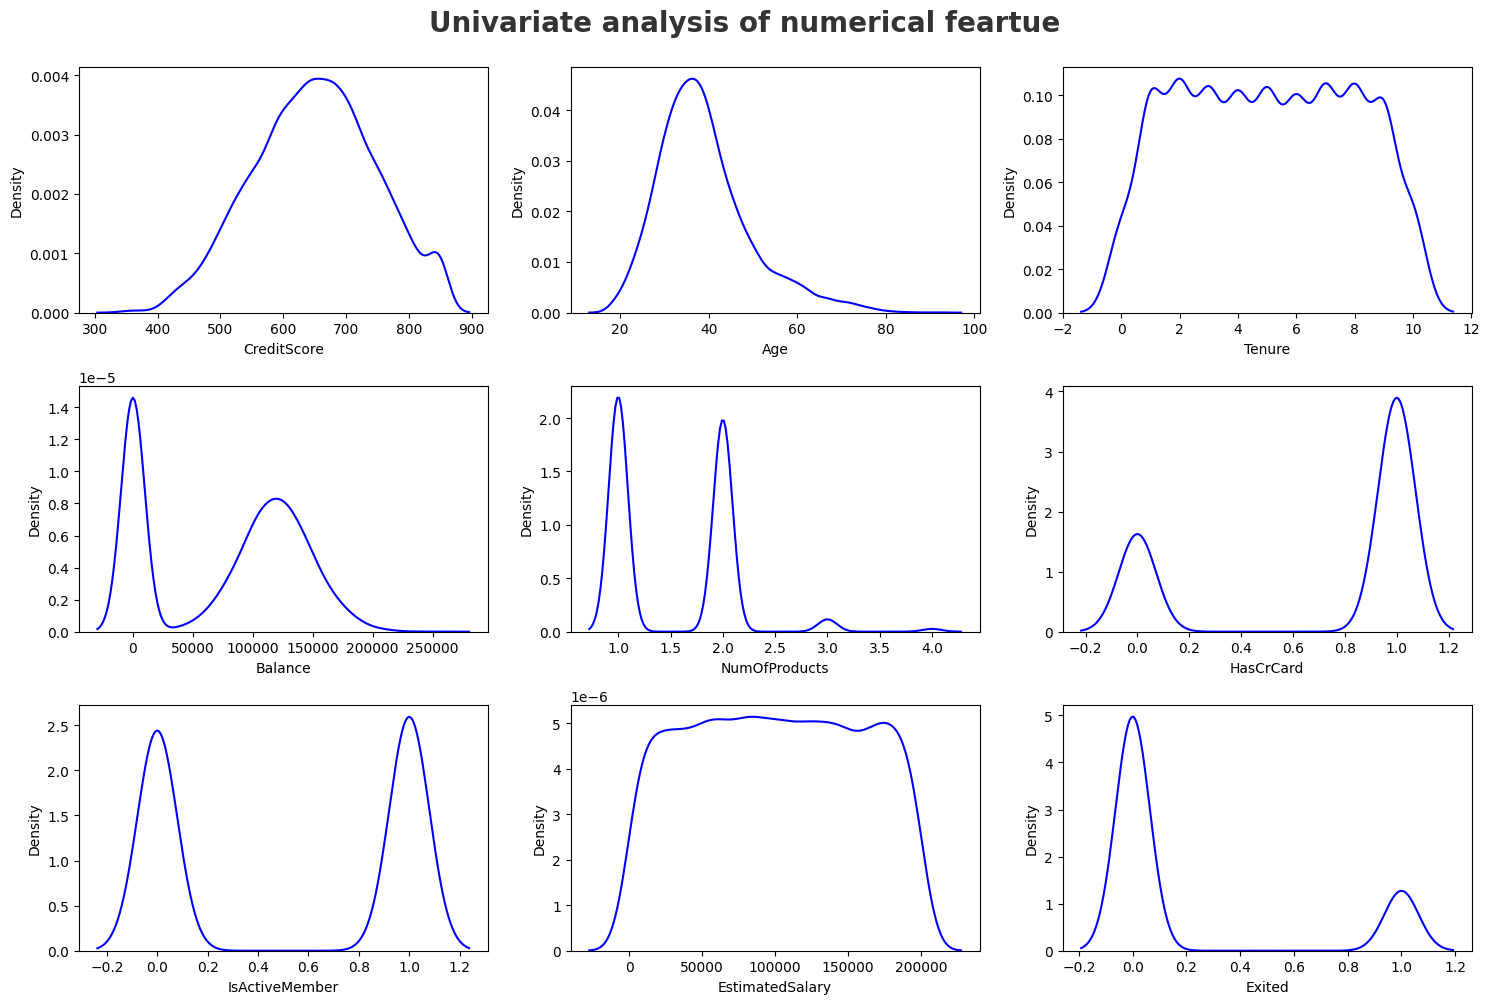

In [18]:
plt.figure(figsize=(15,10))

plt.suptitle('Univariate analysis of numerical feartue', fontsize = 20, fontweight = 'bold', alpha = 0.8 , y = 1.)

for i in range (0, len(numerical_feature)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x = df[numerical_feature[i]], color = 'Blue')
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()
                
    
                

# Catagorical feature

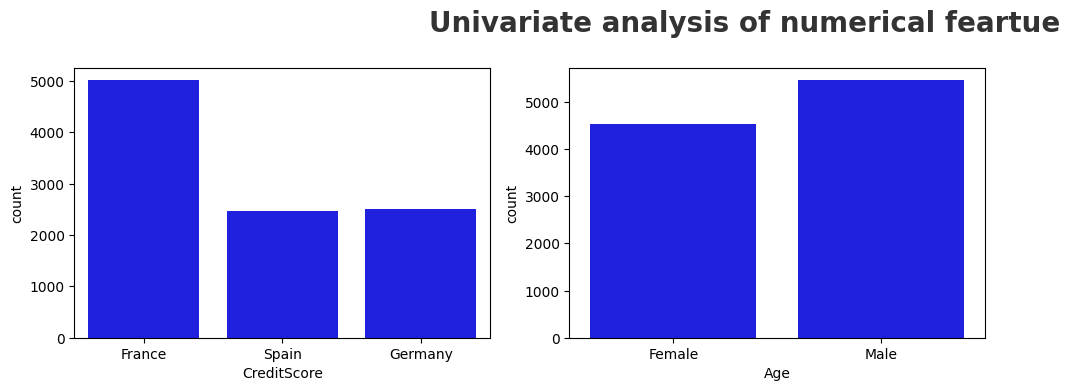

In [20]:
plt.figure(figsize=(15,10))

plt.suptitle('Univariate analysis of numerical feartue', fontsize = 20, fontweight = 'bold', alpha = 0.8 , y = 1.)

for i in range (0, len(categorical_featue)):
    plt.subplot(3,3,i+1)
    sns.countplot(x = df[categorical_featue[i]],color = 'Blue')
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

In [22]:
discrete_feature = [feature for feature in numerical_feature if len(df[feature].unique()) <= 25]

continuous_feature = [feature for feature in numerical_feature if len(df[feature].unique()) > 25]

print (discrete_feature)
print (continuous_feature)



['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


#  Multicollinearity for categorical feature

we calculate by using chi squred test

In [24]:
from scipy.stats import chi2_contingency

Chi2_test = []

for feature in categorical_featue:
    if chi2_contingency(pd.crosstab(df['Exited'], df[feature]))[1] < 0.5:
        Chi2_test.append('Reject Null hypothesis')
    
    else:
        Chi2_test.append("fail to reject the null hypothesis")
result = pd.DataFrame(data=[categorical_featue, Chi2_test])
result.columns = ['Columns', 'hypothesis']

result

,Columns,hypothesis
0,Geography,Gender
1,Reject Null hypothesis,Reject Null hypothesis
